In [210]:
#Import dependencies
import numpy as np
import pandas as pd
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import matplotlib.pyplot as plt


In [211]:
#Assign database file to a variable
# db_file = "Data/crimedata.db"

# Connect to database file
# conn = sqlite3.connect(db_file)


In [212]:
#Query the la crime data table and put into a pandas dataframe
# crime_df = pd.read_sql_query("select * from la_crime_1718;", conn)
# crime_df.head()

In [213]:
crime_df = pd.read_csv('crime_dataset.csv')
crime_df.head()

,Location,Crime_Type,Time,DateOccurred,Investigation Status,CrimeCode,Comments
0,LODHI COLONY,gangrape,22:31,2020-06-15,Open,C8160,-
1,MANDIR MARG,sexual harassement,15:47,2019-09-28,Under Investigation,C8906,-
2,TUGLAK ROAD,gangrape,01:34,2020-06-19,Unknown,Unknown,Missing information
3,PANDAV NAGAR,theft,12:32,2019-10-28,Open,C1009,-
4,GHAZIPUR,robbery,15:47,2019-08-31,Closed,Unknown,Missing information


In [214]:
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'].astype(str), errors='coerce')
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'], format = '%d/%m/%Y %H:%M:%S')

In [215]:
column_1 = crime_df.iloc[:,3]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
#               "dayofyear": column_1.dt.dayofyear,
#               "week": column_1.dt.week,
#               "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "quarter": column_1.dt.quarter,
             })

In [216]:
dataset1=crime_df.drop('DateOccurred',axis=1)
data1=pd.concat([db,dataset1],axis=1)
data1

,year,month,day,dayofweek,quarter,Location,Crime_Type,Time,Investigation Status,CrimeCode,Comments
0,2020,6,15,0,2,LODHI COLONY,gangrape,22:31,Open,C8160,-
1,2019,9,28,5,3,MANDIR MARG,sexual harassement,15:47,Under Investigation,C8906,-
2,2020,6,19,4,2,TUGLAK ROAD,gangrape,01:34,Unknown,Unknown,Missing information
3,2019,10,28,0,4,PANDAV NAGAR,theft,12:32,Open,C1009,-
4,2019,8,31,5,3,GHAZIPUR,robbery,15:47,Closed,Unknown,Missing information
...,...,...,...,...,...,...,...,...,...,...,...
3495,2019,9,28,5,3,NEW USMANPUR,rape,10:12,Closed,C5114,-
3496,2019,9,6,4,3,PUNJABI BAGH,assualt murders,03:06,Under Investigation,C1116,-
3497,2019,10,8,1,4,H. N. DIN,rape,01:11,Under Investigation,C2345,-
3498,2020,3,17,1,1,KIRTI NAGAR,sexual harassement,16:39,Open,C6102,-


In [217]:
# data1.dropna(inplace=True)
# data1

In [218]:
# model_df = data1.drop(['WeaponDescription', 'VictimSex', 'VictimDescent', 'StatusCode', 'StatusDescription',
#                          'Address', 'CrossStreet', 'CrimeCode1', 'CrimeCode2', 'CrimeCode3', 'CrimeCode4', 
#                        'CrimeCodeDescription', 'PremiseDescription', 'AreaName', 'Location','DateReported',], axis=1)
# model_df.dropna()

In [219]:
model_small_df = data1[:510]
model_small_df

,year,month,day,dayofweek,quarter,Location,Crime_Type,Time,Investigation Status,CrimeCode,Comments
0,2020,6,15,0,2,LODHI COLONY,gangrape,22:31,Open,C8160,-
1,2019,9,28,5,3,MANDIR MARG,sexual harassement,15:47,Under Investigation,C8906,-
2,2020,6,19,4,2,TUGLAK ROAD,gangrape,01:34,Unknown,Unknown,Missing information
3,2019,10,28,0,4,PANDAV NAGAR,theft,12:32,Open,C1009,-
4,2019,8,31,5,3,GHAZIPUR,robbery,15:47,Closed,Unknown,Missing information
...,...,...,...,...,...,...,...,...,...,...,...
505,2020,1,14,1,1,JAGATPURI,murder,10:03,Open,C2403,-
506,2020,2,10,0,1,DWARKA NORTH,assualt murders,08:08,Under Investigation,C3139,-
507,2019,9,26,3,3,PATEL NAGAR,rape,22:16,Closed,C7184,-
508,2019,11,16,5,4,BINDAPUR,sexual harassement,13:07,Open,C3630,-


In [220]:
month = model_small_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month

,month,CrimeCode
0,1,46
1,2,33
2,3,51
3,4,29
4,5,48
5,6,48
6,7,37
7,8,28
8,9,47
9,10,45


In [221]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (12, 1) (12, 1)


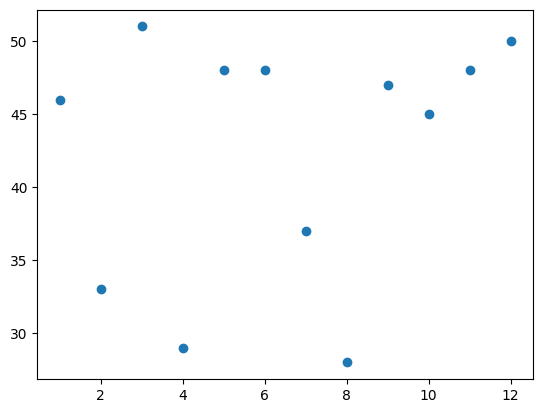

In [222]:
plt.scatter(X, y)

In [223]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [224]:
model.fit(X, y)

LinearRegression()

In [225]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.54545455]]
y-axis intercept:  [38.95454545]


In [226]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 0, 'Month')

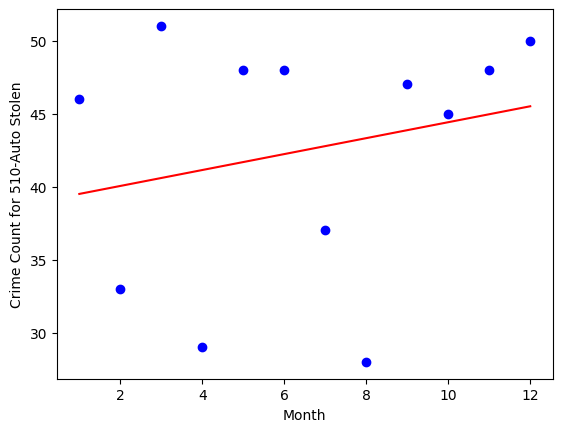

In [227]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Month')

In [228]:
week = model_small_df.groupby('dayofweek')
week = week['CrimeCode'].count()
week = week.reset_index()
week

,dayofweek,CrimeCode
0,0,79
1,1,72
2,2,66
3,3,72
4,4,60
5,5,75
6,6,86


In [229]:
X = week.dayofweek.values.reshape(-1, 1)
y = week.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
print(y)

Shape:  (7, 1) (7, 1)
[[79]
 [72]
 [66]
 [72]
 [60]
 [75]
 [86]]


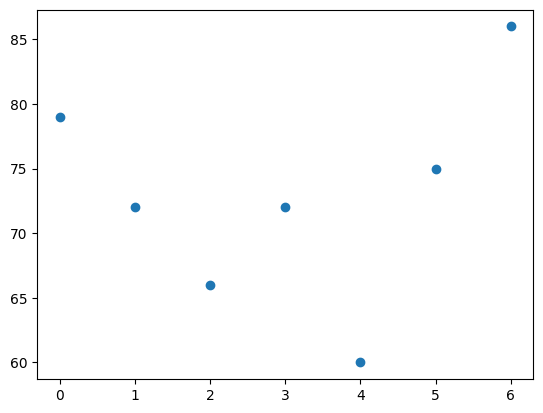

In [230]:
plt.scatter(X, y)

In [231]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.75]]
y-axis intercept:  [70.60714286]


Text(0.5, 0, 'Week')

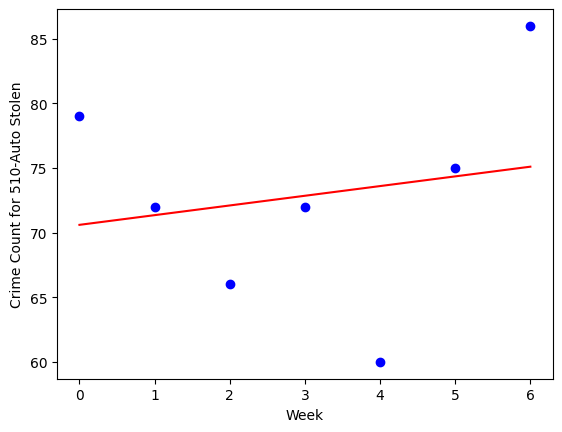

In [232]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Week')

In [233]:
#other crime code example

In [234]:
model_210_df = data1[:210]
model_210_df

,year,month,day,dayofweek,quarter,Location,Crime_Type,Time,Investigation Status,CrimeCode,Comments
0,2020,6,15,0,2,LODHI COLONY,gangrape,22:31,Open,C8160,-
1,2019,9,28,5,3,MANDIR MARG,sexual harassement,15:47,Under Investigation,C8906,-
2,2020,6,19,4,2,TUGLAK ROAD,gangrape,01:34,Unknown,Unknown,Missing information
3,2019,10,28,0,4,PANDAV NAGAR,theft,12:32,Open,C1009,-
4,2019,8,31,5,3,GHAZIPUR,robbery,15:47,Closed,Unknown,Missing information
...,...,...,...,...,...,...,...,...,...,...,...
205,2019,12,6,4,4,ADRASH NAGAR,theft,17:41,Open,C5328,-
206,2019,7,15,0,3,JAFFARPUR KALAN,assualt murders,15:09,Closed,C2309,-
207,2020,4,3,4,2,DABRI,sexual harassement,18:30,Closed,C9434,Missing information
208,2019,8,23,4,3,SONIA VIHAR,gangrape,19:10,Open,C9846,Missing information


In [235]:
month = model_210_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month.head()

,month,CrimeCode
0,1,15
1,2,14
2,3,25
3,4,7
4,5,22


In [236]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (12, 1) (12, 1)


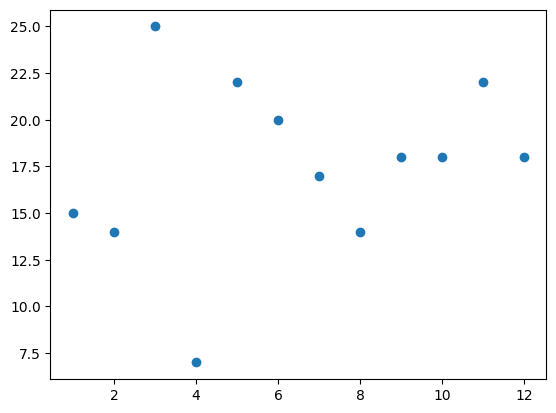

In [237]:
plt.scatter(X, y)

In [238]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.29370629]]
y-axis intercept:  [15.59090909]


Text(0.5, 0, 'Month')

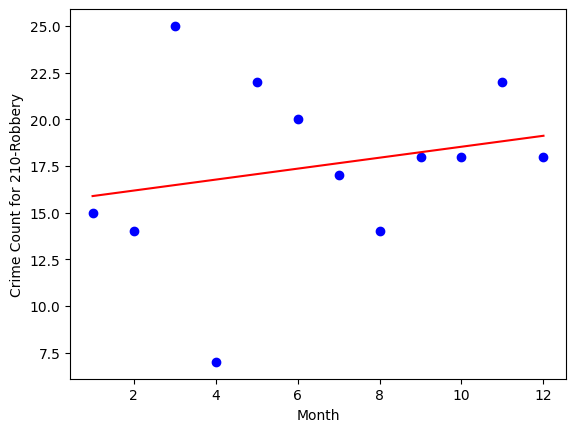

In [239]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Month')

In [240]:
week = model_210_df.groupby('dayofweek')
week = week['CrimeCode'].count()
week = week.reset_index()
week.head()

,dayofweek,CrimeCode
0,0,36
1,1,24
2,2,29
3,3,27
4,4,28


In [241]:
X = week.dayofweek.values.reshape(-1, 1)
y = week.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (7, 1) (7, 1)


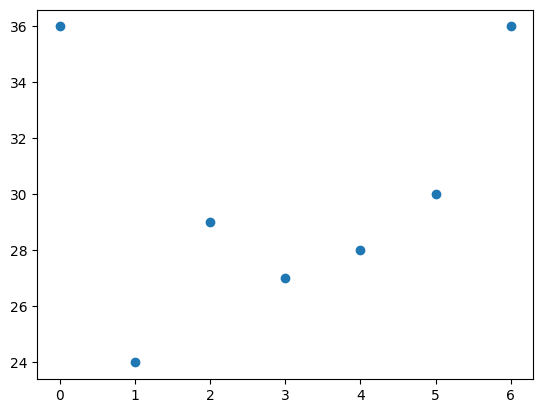

In [242]:
plt.scatter(X, y)

In [243]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.39285714]]
y-axis intercept:  [28.82142857]


Text(0.5, 0, 'Week')

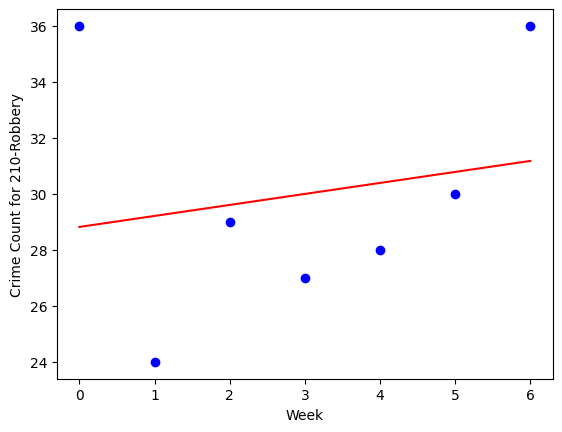

In [244]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Week')

In [245]:
model_small_df = data1[:510]
model_small_df

,year,month,day,dayofweek,quarter,Location,Crime_Type,Time,Investigation Status,CrimeCode,Comments
0,2020,6,15,0,2,LODHI COLONY,gangrape,22:31,Open,C8160,-
1,2019,9,28,5,3,MANDIR MARG,sexual harassement,15:47,Under Investigation,C8906,-
2,2020,6,19,4,2,TUGLAK ROAD,gangrape,01:34,Unknown,Unknown,Missing information
3,2019,10,28,0,4,PANDAV NAGAR,theft,12:32,Open,C1009,-
4,2019,8,31,5,3,GHAZIPUR,robbery,15:47,Closed,Unknown,Missing information
...,...,...,...,...,...,...,...,...,...,...,...
505,2020,1,14,1,1,JAGATPURI,murder,10:03,Open,C2403,-
506,2020,2,10,0,1,DWARKA NORTH,assualt murders,08:08,Under Investigation,C3139,-
507,2019,9,26,3,3,PATEL NAGAR,rape,22:16,Closed,C7184,-
508,2019,11,16,5,4,BINDAPUR,sexual harassement,13:07,Open,C3630,-


In [246]:
model_small_df = model_small_df[['CrimeCode','Location','Crime_Type']]

In [247]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head()

,CrimeCode,Location,Crime_Type
0,C8160,LODHI COLONY,gangrape
1,C8906,MANDIR MARG,sexual harassement
2,Unknown,TUGLAK ROAD,gangrape
3,C1009,PANDAV NAGAR,theft
4,Unknown,GHAZIPUR,robbery


In [248]:
# model_small_df['Crime_Type'] = model_small_df['Crime_Type'].apply(pd.to_numeric, errors='coerce')

# model_small_df['CrimeCode'] = model_small_df['CrimeCode'].apply(pd.to_numeric, errors='coerce')

# model_small_df['Location'] = model_small_df['Location'].apply(pd.to_numeric, errors='coerce')


In [249]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head(5)

,CrimeCode,Location,Crime_Type
0,C8160,LODHI COLONY,gangrape
1,C8906,MANDIR MARG,sexual harassement
2,Unknown,TUGLAK ROAD,gangrape
3,C1009,PANDAV NAGAR,theft
4,Unknown,GHAZIPUR,robbery


In [250]:
X = model_small_df.drop("Location", axis=1)
y = model_small_df["Location"]
print(X.shape, y.shape)

(510, 2) (510,)


In [251]:
import numpy as np
print("Unique labels and counts:", np.unique(y, return_counts=True))

Unique labels and counts: (array(['ADRASH NAGAR', 'AMAR COLONY', 'ANAND PARBAT', 'ANANDVIHAR',
       'ASHOK VIHAR', 'BABA HARI DAS NAGAR', 'BADAR PUR',
       'BARA HINDU RAO', 'BARAKHAMBA ROAD', 'BAWANA', 'BEGUM PUR',
       'BHAJANPURI', 'BHALSWA DAIRY', 'BHARAT NAGAR', 'BINDAPUR',
       'BURARI', 'CHANAKYAPURI', 'CHANDNI MAHAL', 'CHHAWLA',
       'CHITRANJAN PARK', 'CIVIL LINES', 'CONNAUGHT PLACE', 'DABRI',
       'DARYA GANJ', 'DEFENCE COLONY', 'DELHI CANTT', 'DWARKA NORTH',
       'DWARKA SEC-23', 'DWARKA SOUTH', 'FARASH BAZAR', 'FATEHPUR BERI',
       'G.T.B. ENCLAVE', 'GANDHI NAGAR', 'GEETA COLONY', 'GHAZIPUR',
       'GOKULPURI', 'GOVIND PURI', 'GREATER KAILASH', 'GULABIBAGH',
       'H. N. DIN', 'HARI NAGAR', 'HARSH VIHAR', 'HAUZ KHAS', 'HAUZQAZI',
       'I.P. ESTATE', 'INDERPURI', 'JAFFARPUR KALAN', 'JAGATPURI',
       'JAHANGIR PURI', 'JAMA MASJID', 'JAMIA NAGAR', 'JANAK PURI',
       'JYOTI NAGAR', 'KALKAJI', 'KALYANPURI', 'KAMLA MARKET',
       'KANJHAWALA', 'KAPASHERA'

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
y_counts = y.value_counts()
valid_classes = y_counts[y_counts > 3].index  # Keep only locations appearing more than 3 times
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]
label_encoder = LabelEncoder()
X_filtered = label_encoder.fit_transform(X_filtered['CrimeCode'])


X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

X = X_filtered
y = y_filtered

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [254]:
print("Unique labels in y:", np.unique(y))  # Ensure there are multiple classes

Unique labels in y: ['ADRASH NAGAR' 'AMAR COLONY' 'ANANDVIHAR' 'BABA HARI DAS NAGAR'
 'BADAR PUR' 'BARAKHAMBA ROAD' 'BAWANA' 'BHAJANPURI' 'BHALSWA DAIRY'
 'CHHAWLA' 'CIVIL LINES' 'DABRI' 'DARYA GANJ' 'DELHI CANTT'
 'DWARKA SEC-23' 'FATEHPUR BERI' 'G.T.B. ENCLAVE' 'GEETA COLONY'
 'H. N. DIN' 'INDERPURI' 'JANAK PURI' 'KALKAJI' 'KALYANPURI'
 'KAMLA MARKET' 'KANJHAWALA' 'KASHMERE GATE' 'KESHAV PURAM'
 'KN KATJU MARG' 'KOTALA MUBARAK PUR' 'LAHORI GATE' 'MAURICE NAGAR'
 'MAURYA ENCLAVE' 'MAYURVIHAR' 'MEHRAULI' 'MODEL TOWN' 'MUKHERJI NAGAR'
 'MUNDKA' 'NANDNAGARI' 'NANGLOI' 'NARELA' 'NEB SARAI' 'PANDAV NAGAR'
 'PATEL NAGAR' 'PRASHANT VIHAR' 'RAJOURI GARDEN' 'RANJIT NAGAR'
 'ROHINI NORTH' 'ROOP NAGAR' 'SAFDARJUNG ENCLAVE' 'SAGARPUR' 'SAKET'
 'SAMAYPURBADLI' 'SHAHBAD DAIRY' 'SHAHDARA' 'SHAKARPUR' 'SONIA VIHAR'
 'SUBHASH PLACE' 'SUBZIMANDI' 'TILAK NAGAR' 'TUGLAK ROAD' 'UTTAM NAGAR'
 'VASANT KUNJ SOUTH' 'WELCOME']


In [255]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame(data1)

# Replace 'Unknown' and '-' with NaN
df.replace({"Unknown": None, "-": None}, inplace=True)

# Selecting Features and Target
X = df.drop(columns=["Crime_Type"])  # Features
y = df["Crime_Type"]  # Target variable

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
classifier = LogisticRegression(max_iter=100)
classifier.fit(X_train, y_train)

# Predict on Test Data
y_pred = classifier.predict(X_test)

c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.1757142857142857

In [257]:
importances = rf.feature_importances_
importances

array([0.00509814, 0.00521821, 0.00369324, ..., 0.00650074, 0.0063949 ,
       0.00670059], shape=(4202,))

In [258]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [259]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................C=1;, score=0.143 total time=   0.4s
[CV 2/5] END ...............................C=1;, score=0.116 total time=   0.3s
[CV 3/5] END ...............................C=1;, score=0.145 total time=   0.4s
[CV 4/5] END ...............................C=1;, score=0.130 total time=   0.3s
[CV 5/5] END ...............................C=1;, score=0.163 total time=   0.2s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............................C=5;, score=0.134 total time=   0.3s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............................C=5;, score=0.109 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............................C=5;, score=0.139 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............................C=5;, score=0.154 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............................C=5;, score=0.171 total time=   0.5s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............................C=10;, score=0.136 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............................C=10;, score=0.113 total time=   0.5s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............................C=10;, score=0.141 total time=   0.3s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............................C=10;, score=0.155 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............................C=10;, score=0.177 total time=   0.3s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............................C=50;, score=0.132 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............................C=50;, score=0.114 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............................C=50;, score=0.136 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............................C=50;, score=0.164 total time=   0.3s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............................C=50;, score=0.170 total time=   0.4s


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [1, 5, 10, 50]},
             verbose=3)

In [260]:
print(grid.best_params_)

{'C': 10}


In [261]:
print(grid.best_score_)

0.1442857142857143


In [262]:
predictions = grid.predict(X_test)

In [263]:
print(len(y), len(predictions))  # Should match
predictions

3500 700


array(['rape', 'assualt murders', 'murder', 'robbery', 'rape', 'rape',
       'sexual harassement', 'murder', 'assualt murders', 'murder',
       'assualt murders', 'assualt murders', 'murder', 'assualt murders',
       'murder', 'robbery', 'assualt murders', 'rape', 'rape', 'murder',
       'sexual harassement', 'robbery', 'robbery', 'assualt murders',
       'assualt murders', 'assualt murders', 'assualt murders',
       'gangrape', 'theft', 'theft', 'gangrape', 'murder', 'robbery',
       'rape', 'gangrape', 'theft', 'rape', 'theft', 'sexual harassement',
       'robbery', 'sexual harassement', 'theft', 'gangrape', 'robbery',
       'robbery', 'sexual harassement', 'robbery', 'assualt murders',
       'sexual harassement', 'assualt murders', 'rape', 'assualt murders',
       'sexual harassement', 'robbery', 'theft', 'sexual harassement',
       'gangrape', 'robbery', 'robbery', 'robbery', 'gangrape', 'theft',
       'robbery', 'murder', 'rape', 'rape', 'assualt murders', 'rape',
   

In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

   assualt murders       0.21      0.21      0.21       107
          gangrape       0.18      0.18      0.18        97
            murder       0.15      0.13      0.14        99
              rape       0.16      0.18      0.17        91
           robbery       0.14      0.16      0.15        97
sexual harassement       0.21      0.22      0.22        99
             theft       0.18      0.17      0.18       110

          accuracy                           0.18       700
         macro avg       0.18      0.18      0.18       700
      weighted avg       0.18      0.18      0.18       700



In [265]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [266]:
knn.score(X_test,y_test)

0.14714285714285713

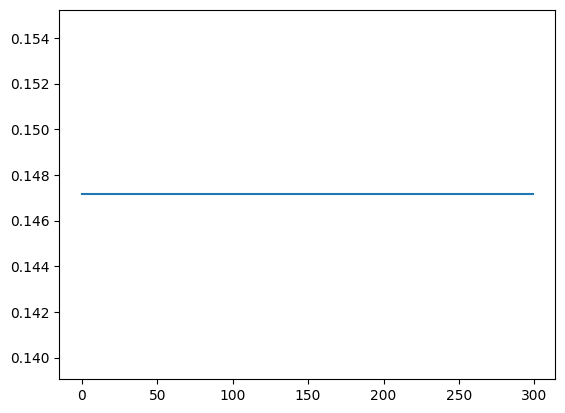

In [267]:
y_list = []
x_list = []
for i in range(300):
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train,y_train)
    y_list.append(knn.score(X_test,y_test))
    x_list.append(i)

plt.plot(x_list,y_list)


In [268]:
knn.score(X_train,y_train)

0.5760714285714286

k: 1, Train/Test Score: 1.000/0.137
k: 3, Train/Test Score: 0.481/0.140
k: 5, Train/Test Score: 0.403/0.146
k: 7, Train/Test Score: 0.349/0.154
k: 9, Train/Test Score: 0.322/0.160
k: 11, Train/Test Score: 0.314/0.164
k: 13, Train/Test Score: 0.300/0.157
k: 15, Train/Test Score: 0.290/0.167
k: 17, Train/Test Score: 0.276/0.164
k: 19, Train/Test Score: 0.269/0.166


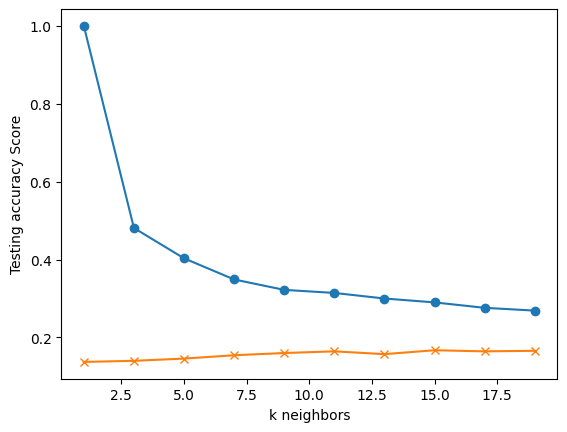

In [269]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()